## Import Libs

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import xgboost
import pickle as pkl
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings ("ignore")


# 1. DATA OVERVIEW

### Load Data

In [5]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income,Diabetes_binary
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0


### Get the dimensions of the DataFrame

In [8]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (250000, 18)


### Data Information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          250000 non-null  int64
 1   HighBP                250000 non-null  int64
 2   HighChol              250000 non-null  int64
 3   CholCheck             250000 non-null  int64
 4   BMI                   250000 non-null  int64
 5   Smoker                250000 non-null  int64
 6   Stroke                250000 non-null  int64
 7   HeartDiseaseorAttack  250000 non-null  int64
 8   PhysActivity          250000 non-null  int64
 9   HvyAlcoholConsump     250000 non-null  int64
 10  AnyHealthcare         250000 non-null  int64
 11  NoDocbcCost           250000 non-null  int64
 12  GenHlth               250000 non-null  int64
 13  MentHlth              250000 non-null  int64
 14  Sex                   250000 non-null  int64
 15  Age                   250000 non-n

### Columns

In [14]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex', 'Age',
       'Income', 'Diabetes_binary'],
      dtype='object')

In [16]:
data = data.rename(columns ={'Diabetes_012':'Diabetes_possibility',
                      'NoDocbcCost':'Doctor_Visit',
                      'Diabetes_binary':'Diabetes_Presence(Target)',
                      'AnyHealthcare':'Healthcare_Access'}
           )
data

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income,Diabetes_Presence(Target)
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6,0
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1,0
249997,0,1,0,1,28,1,0,1,1,0,1,0,2,2,0,9,8,0
249998,0,1,1,1,32,0,0,0,0,0,1,0,3,0,1,8,7,1


# 2. DESCRIPTIVE STATISTICS

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_possibility,250000.0,0.293928,0.695322,0.0,0.0,0.0,0.0,2.0
HighBP,250000.0,0.465848,0.498833,0.0,0.0,0.0,1.0,1.0
HighChol,250000.0,0.452744,0.497763,0.0,0.0,0.0,1.0,1.0
CholCheck,250000.0,0.966560,0.179783,0.0,1.0,1.0,1.0,1.0
BMI,250000.0,28.808652,6.903600,12.0,24.0,27.0,32.0,98.0
Smoker,250000.0,0.456468,0.498102,0.0,0.0,0.0,1.0,1.0
Stroke,250000.0,0.046616,0.210815,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,250000.0,0.108920,0.311539,0.0,0.0,0.0,0.0,1.0
PhysActivity,250000.0,0.741364,0.437886,0.0,0.0,1.0,1.0,1.0
HvyAlcoholConsump,250000.0,0.052632,0.223298,0.0,0.0,0.0,0.0,1.0


## Checking Columns for Irrelevancy

In [22]:
data["GenHlth"].value_counts()

GenHlth
2    83405
3    76701
1    40571
4    35065
5    14258
Name: count, dtype: int64

In [24]:
data["Income"].value_counts()

Income
8    85895
7    41938
6    35880
5    26167
4    20869
3    16631
2    12683
1     9937
Name: count, dtype: int64

In [26]:
data["MentHlth"].value_counts()

MentHlth
0     172229
30     12651
2      12636
5       8916
1       8173
3       7215
10      6503
15      5596
4       3660
20      3490
7       2983
25      1290
14      1160
6       1000
8        636
12       415
28       331
21       241
29       173
18       111
9         92
16        91
27        70
22        66
17        51
13        46
23        45
26        41
11        36
24        34
19        19
Name: count, dtype: int64

In [28]:
data["Doctor_Visit"].value_counts()

Doctor_Visit
0    228654
1     21346
Name: count, dtype: int64

## Checking Null values

In [31]:
data.isnull().sum()

Diabetes_possibility         0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
HvyAlcoholConsump            0
Healthcare_Access            0
Doctor_Visit                 0
GenHlth                      0
MentHlth                     0
Sex                          0
Age                          0
Income                       0
Diabetes_Presence(Target)    0
dtype: int64

In [33]:
data.isnull().any()

Diabetes_possibility         False
HighBP                       False
HighChol                     False
CholCheck                    False
BMI                          False
Smoker                       False
Stroke                       False
HeartDiseaseorAttack         False
PhysActivity                 False
HvyAlcoholConsump            False
Healthcare_Access            False
Doctor_Visit                 False
GenHlth                      False
MentHlth                     False
Sex                          False
Age                          False
Income                       False
Diabetes_Presence(Target)    False
dtype: bool

## There are no null values from the looks of it

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Diabetes_possibility       250000 non-null  int64
 1   HighBP                     250000 non-null  int64
 2   HighChol                   250000 non-null  int64
 3   CholCheck                  250000 non-null  int64
 4   BMI                        250000 non-null  int64
 5   Smoker                     250000 non-null  int64
 6   Stroke                     250000 non-null  int64
 7   HeartDiseaseorAttack       250000 non-null  int64
 8   PhysActivity               250000 non-null  int64
 9   HvyAlcoholConsump          250000 non-null  int64
 10  Healthcare_Access          250000 non-null  int64
 11  Doctor_Visit               250000 non-null  int64
 12  GenHlth                    250000 non-null  int64
 13  MentHlth                   250000 non-null  int64
 14  Sex 

In [38]:
data["Diabetes_Presence(Target)"].value_counts()

Diabetes_Presence(Target)
0    189946
1     60054
Name: count, dtype: int64

# 3. UNIVARIATE ANALYSIS - Exploratory Data Analysis

### Histograms for numerical variables

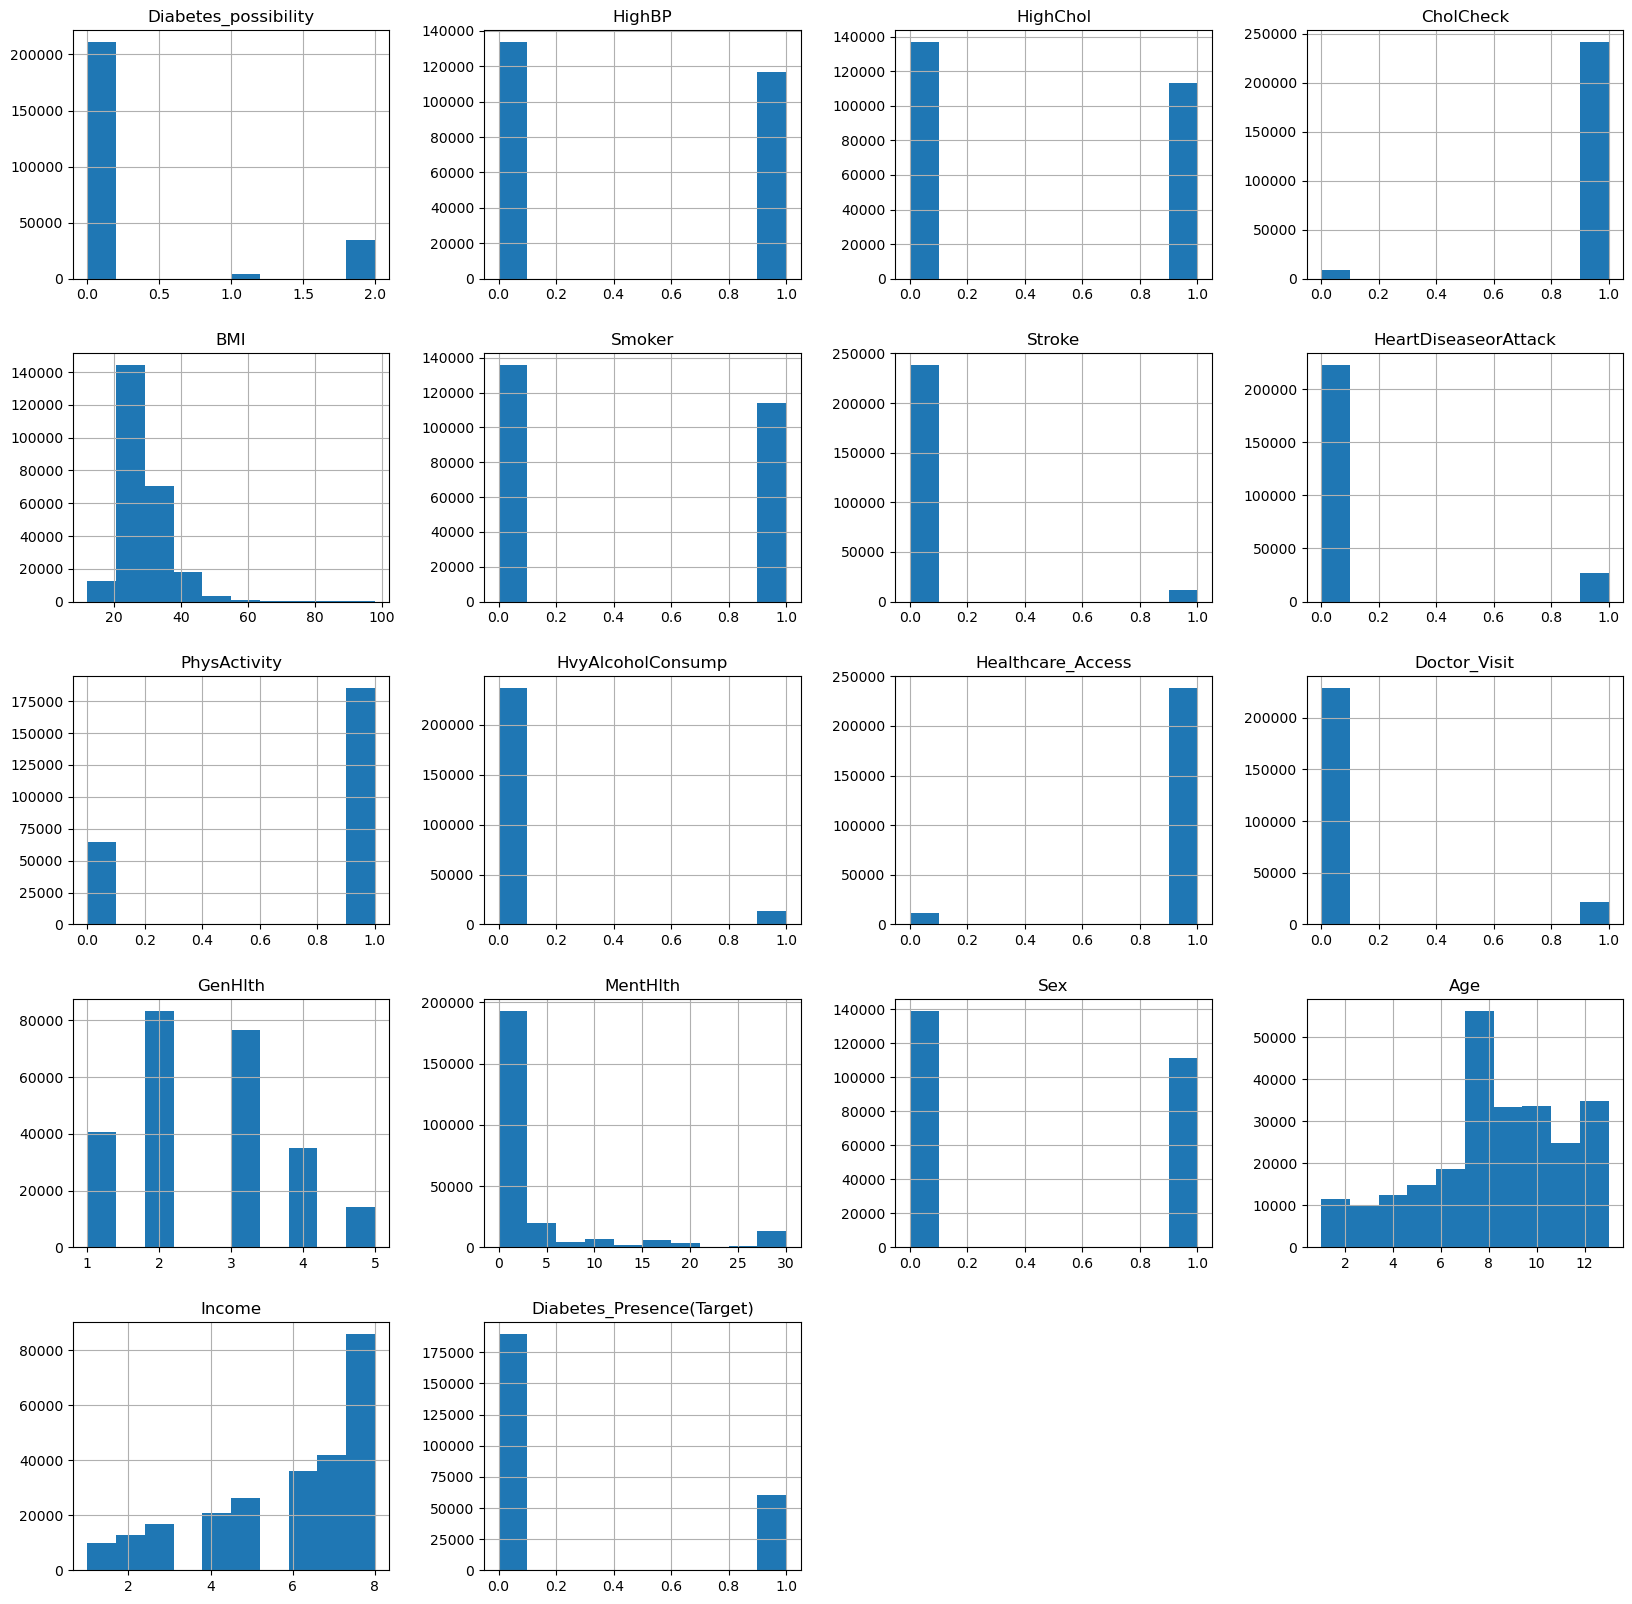

In [42]:
data.hist(figsize=(20,20))
plt.show()

### Pie charts

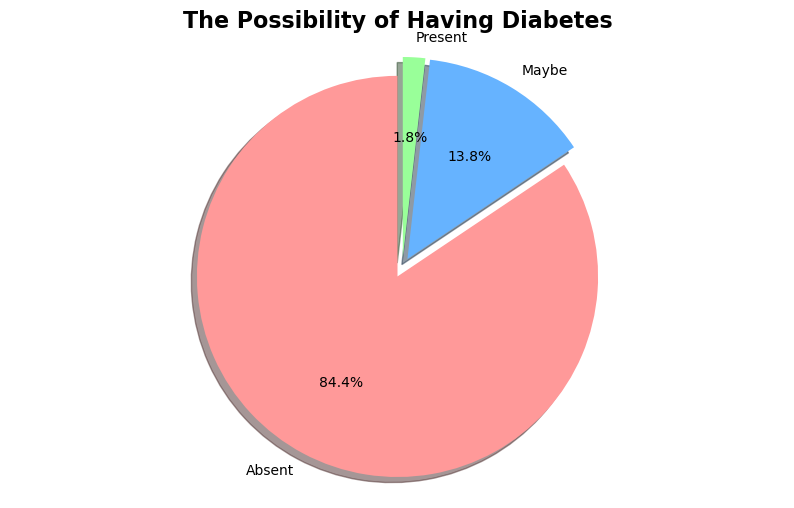

In [44]:
value = data['Diabetes_possibility'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Absent', 'Maybe', 'Present']

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05, 0.05)  
)

plt.title('The Possibility of Having Diabetes', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### The result shows that majority of people did not anticipate having diabetes

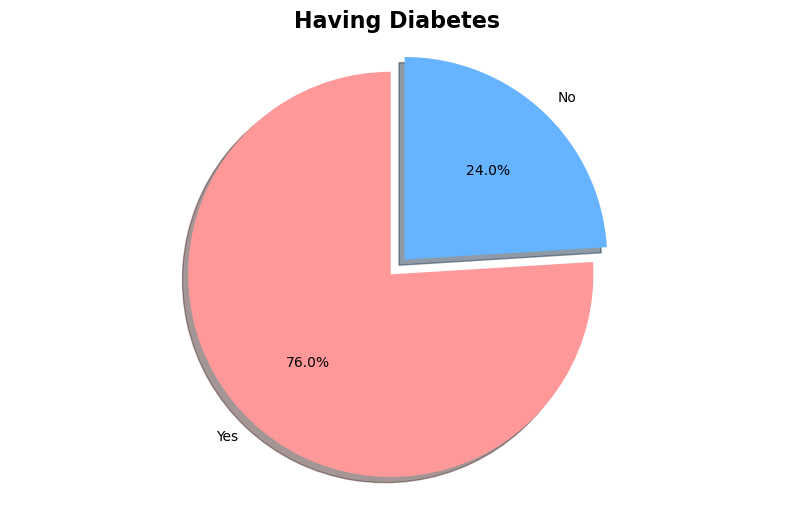

In [46]:
value = data['Diabetes_Presence(Target)'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having Diabetes', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### Relative to their prediction, the majority of the people from the sample dataset ended up having diabetes

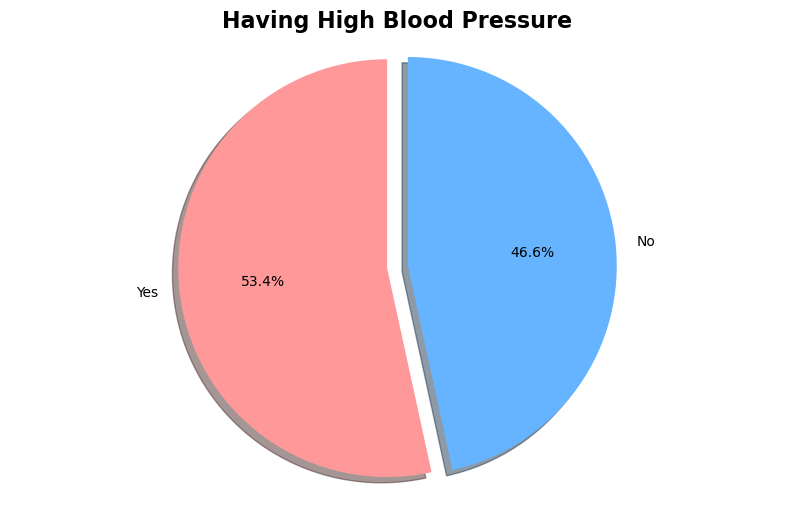

In [49]:
value = data['HighBP'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,            
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having High Blood Pressure', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### About 53% of the sample population ended up having High BP. This can, in msot cases, directly contribute to heart related issues

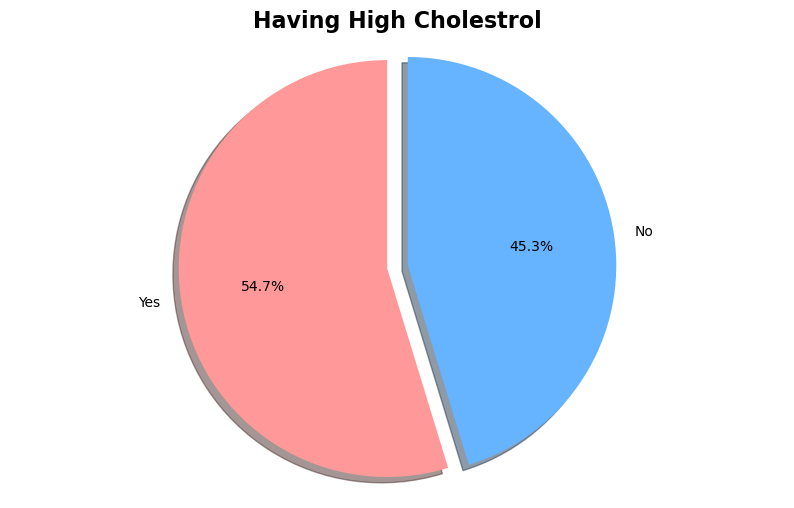

In [54]:
value = data['HighChol'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,           
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having High Cholestrol', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### Similar to the statistic regarding High BP, about 55% of the sample population had High Cholestrol, which directly contributes to heart related issues as well.

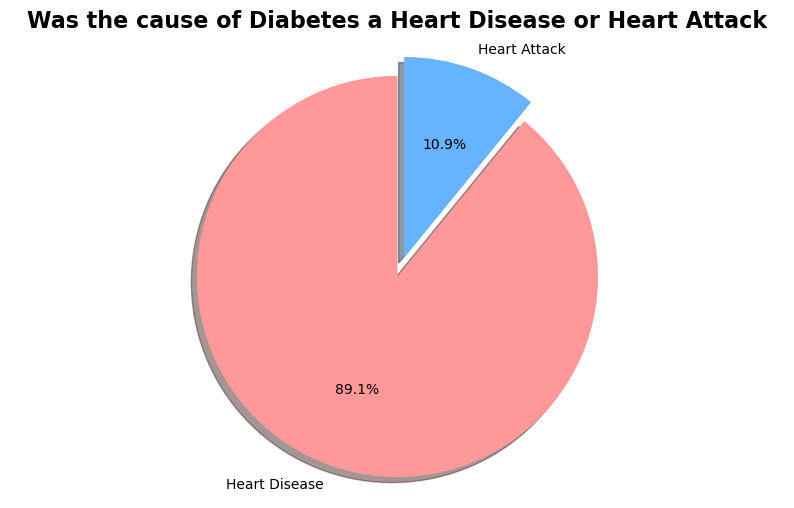

In [57]:
value = data['HeartDiseaseorAttack'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Heart Disease', 'Heart Attack']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,            
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Was the cause of Diabetes a Heart Disease or Heart Attack', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### 89% of the sample population stated that the cause of diabetes was some form of a heart disease and not a heart attack.

<Axes: xlabel='Healthcare_Access', ylabel='count'>

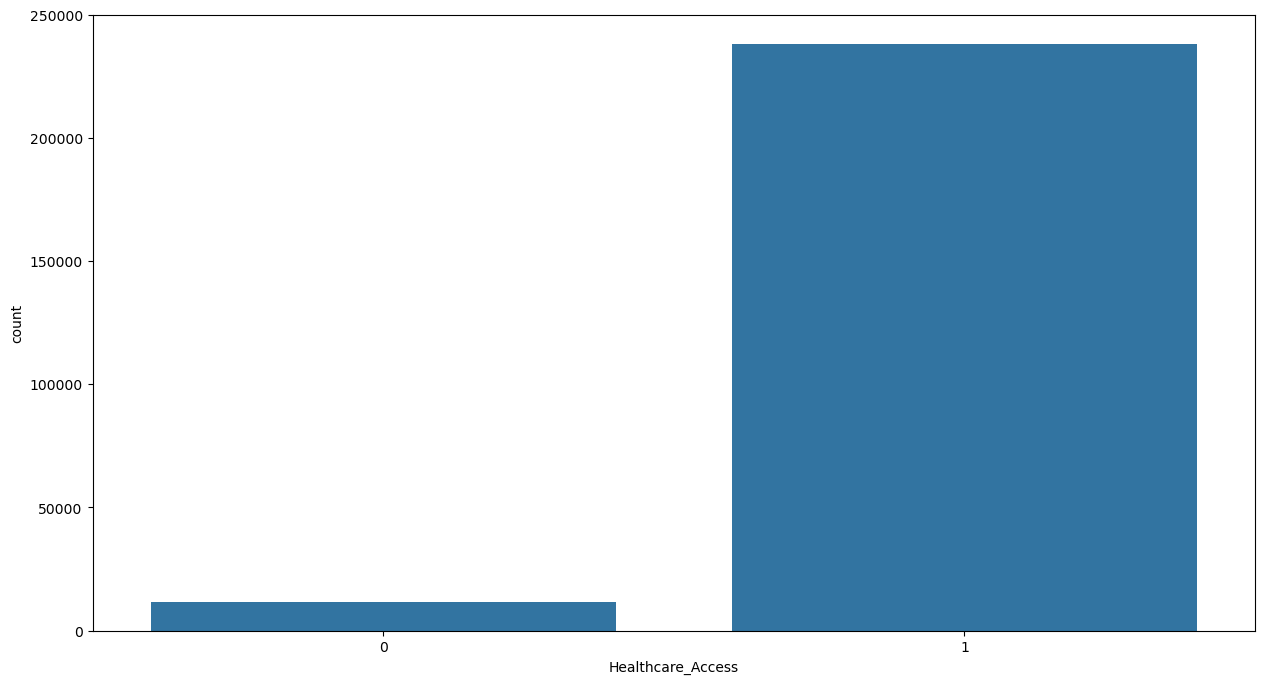

In [60]:
plt.figure(figsize = (15,8))
sns.countplot(x = data['Healthcare_Access'])

### A majority of the sample population stated that they did have proper access to Healthcare amenities

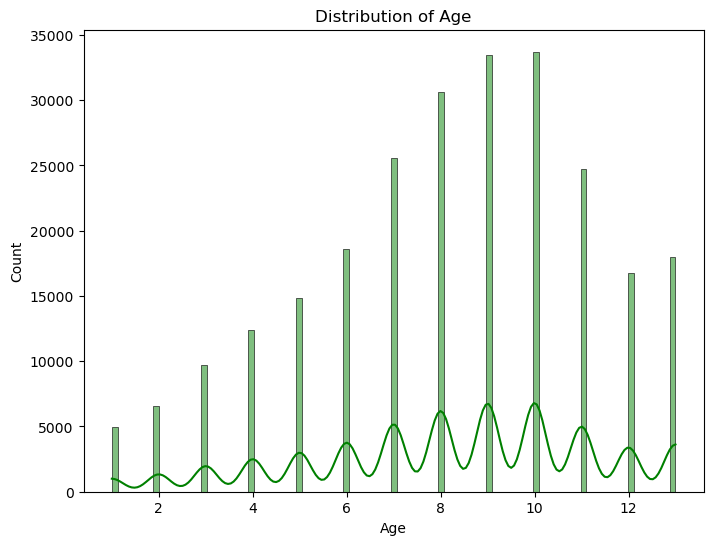

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='green')
plt.title('Distribution of Age')
plt.show()

### A majority of the sample population belonged to the ages between 8 and 10 years old.

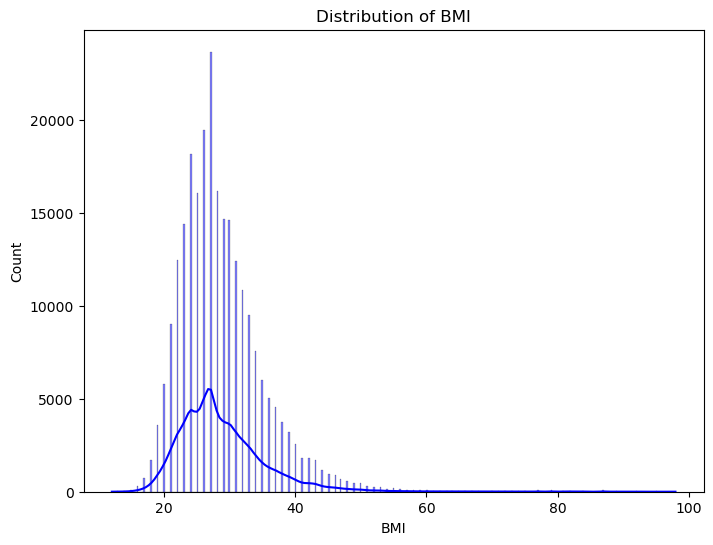

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(data['BMI'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.show()


### A BMI value pf 34 is the most repeating in the sample population

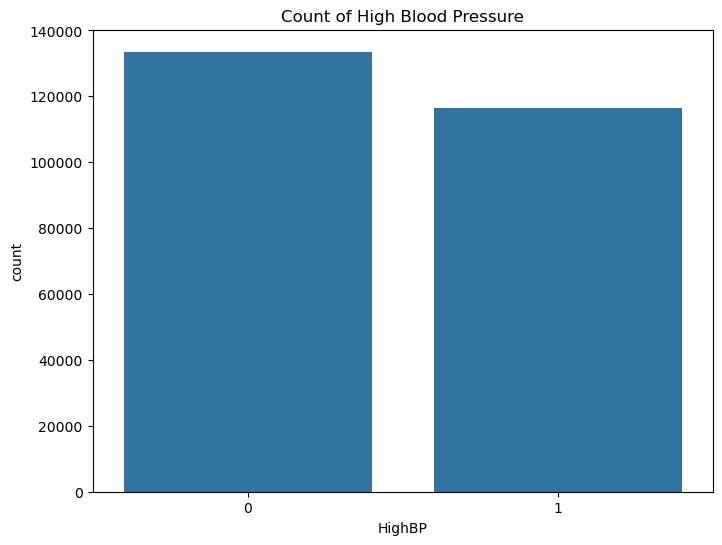

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=data)
plt.title('Count of High Blood Pressure')
plt.show()

### Majority of the people have an above average Blood Pressure from the sample population

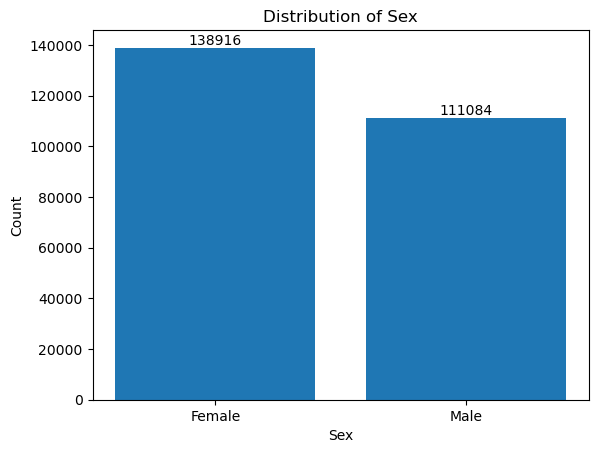

In [72]:
# Get the counts for each unique value in 'Sex'
y_axis = data['Sex'].value_counts()
x_axis = y_axis.index

# Create the bar plot
bars = plt.bar(x_axis, y_axis)

# Add labels to each bar
plt.bar_label(bars)

# Convert x-axis labels to strings if needed (e.g., 1 = Male, 0 = Female)
plt.xticks(ticks=x_axis, labels=['Male' if i == 1 else 'Female' for i in x_axis])

# Add axis labels and a title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

# Show the plot
plt.show()


### Majority of people from the sample population are female

# 4. BIVARIATE ANALYSIS - Exploratory Data Analysis

### Scatter plots for numerical variables

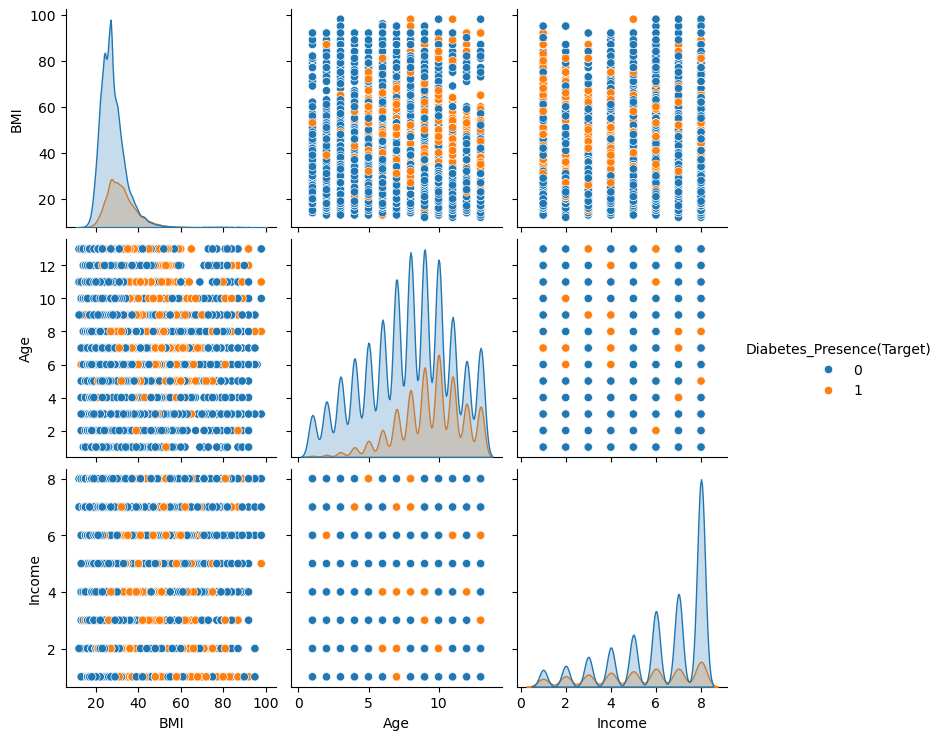

In [77]:
sns.pairplot(data, hue='Diabetes_Presence(Target)', vars=['BMI', 'Age', 'Income'])
plt.show()

### Box plots

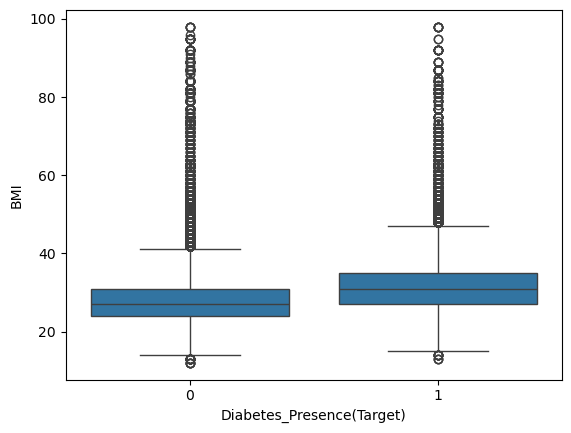

In [79]:
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

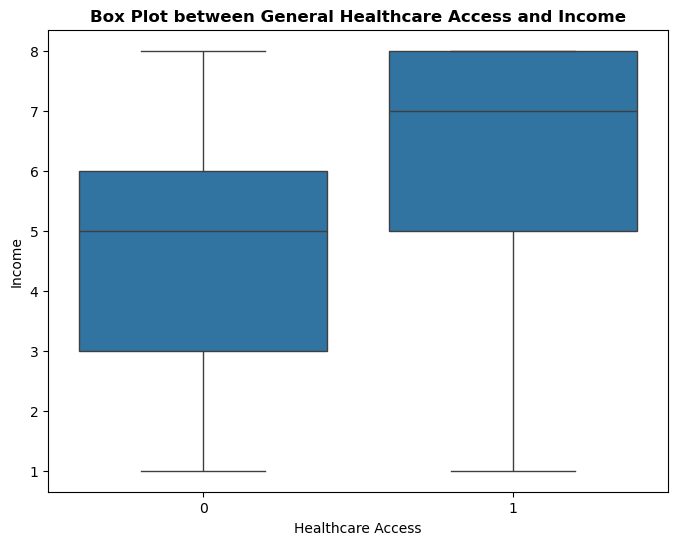

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Healthcare_Access', y='Income', data=data)
plt.title('Box Plot between General Healthcare Access and Income', fontsize=12, fontweight='bold')
plt.xlabel('Healthcare Access', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

### The box plot shows that the people who have a higher income have better access to Healthcare amenities

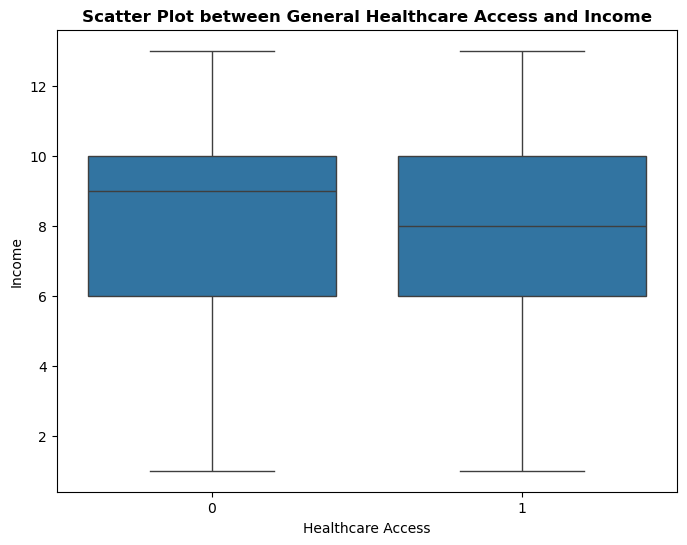

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HvyAlcoholConsump', y='Age', data=data)
plt.title('Scatter Plot between General Healthcare Access and Income', fontsize=12, fontweight='bold')
plt.xlabel('Healthcare Access', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

### The box plot shows that the people who have a higher income have better access to Healthcare amenities

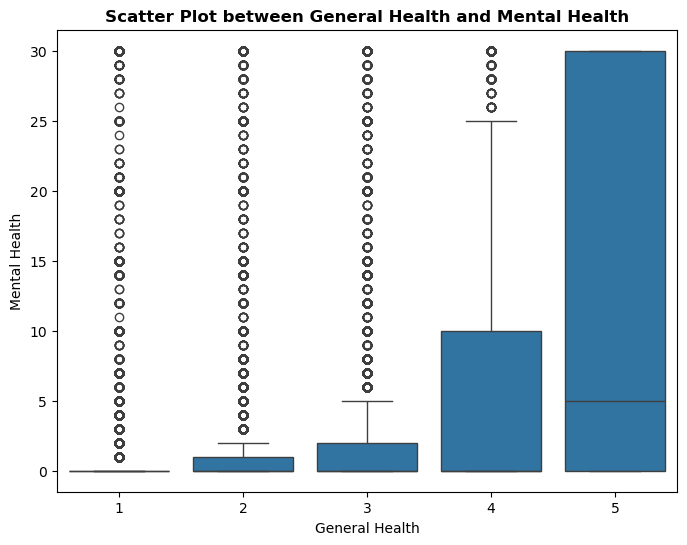

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GenHlth', y='MentHlth', data=data)
plt.title('Scatter Plot between General Health and Mental Health', fontsize=12, fontweight='bold')
plt.xlabel('General Health', fontsize=10)
plt.ylabel('Mental Health', fontsize=10)
plt.show()

### People who's general health is way better also have better mental health, and vice versa

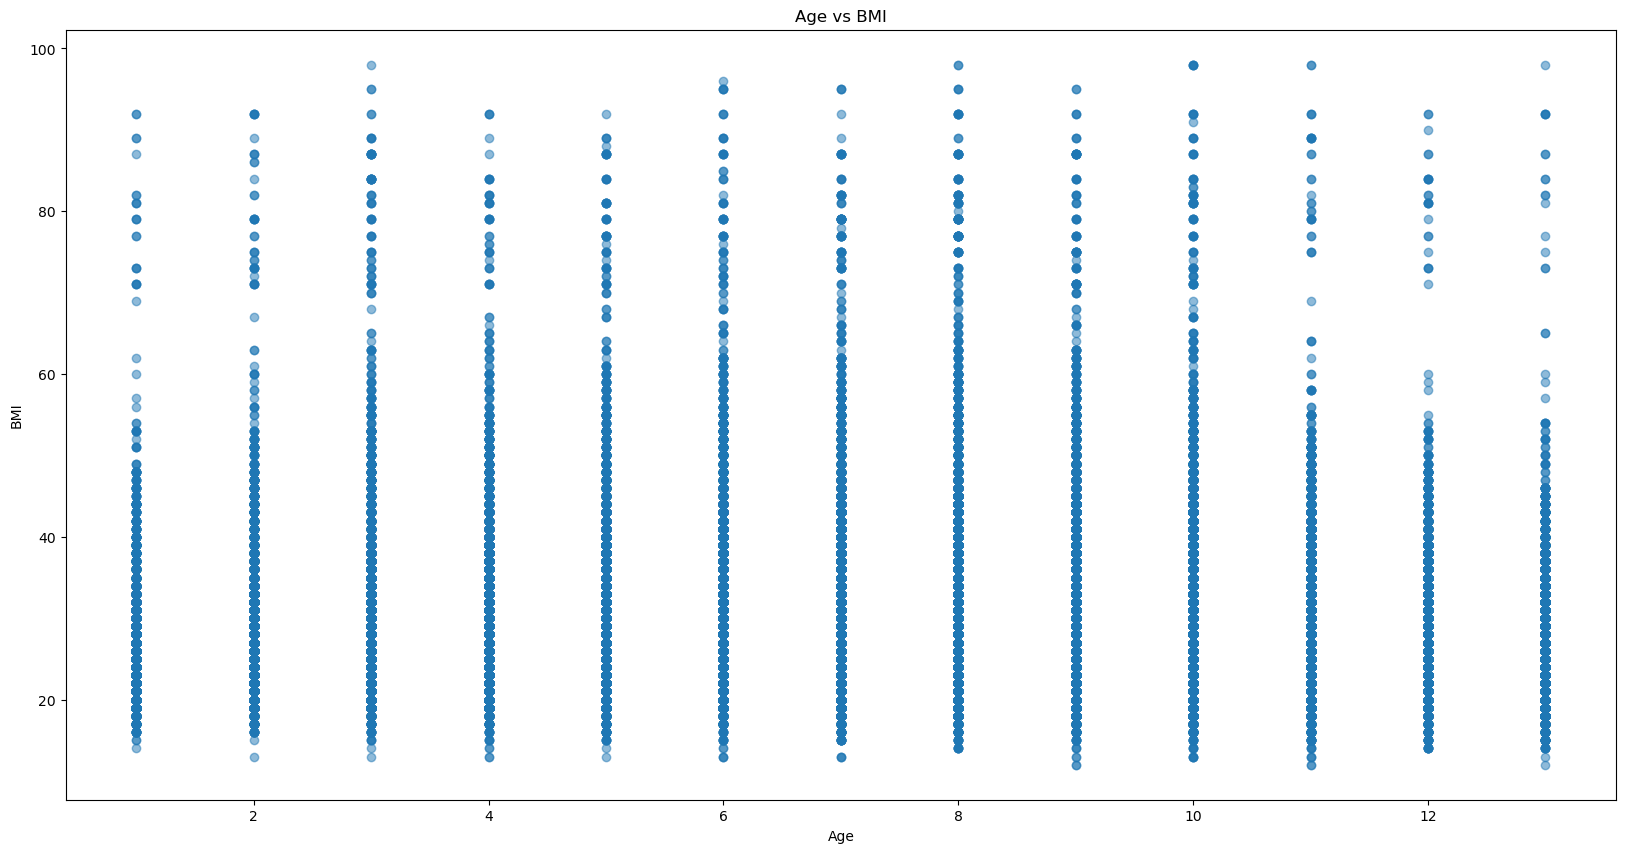

In [86]:
plt.figure(figsize=(20, 10))
plt.scatter(data['Age'], data['BMI'], alpha=0.5)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

### This scatter plot shows the distribution of BMI among different age groups.

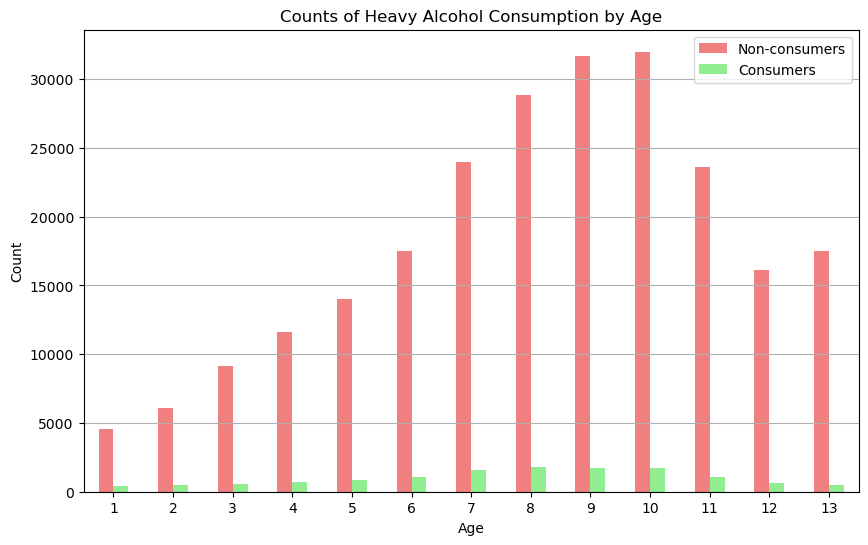

In [88]:
age_counts = data.groupby(['Age', 'HvyAlcoholConsump']).size().unstack(fill_value=0)
age_counts.plot(kind='bar', stacked=False, color=['lightcoral', 'lightgreen'], figsize=(10, 6))
plt.title('Counts of Heavy Alcohol Consumption by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Non-consumers', 'Consumers'])
plt.grid(axis='y')
plt.show()

### There is a higher consumption of alcohol among age groups of 9 to 10 have a higher percentage of people who consume a heavy amount of alcohol, was well as the highest percentage of peoople who are also non-consumers.

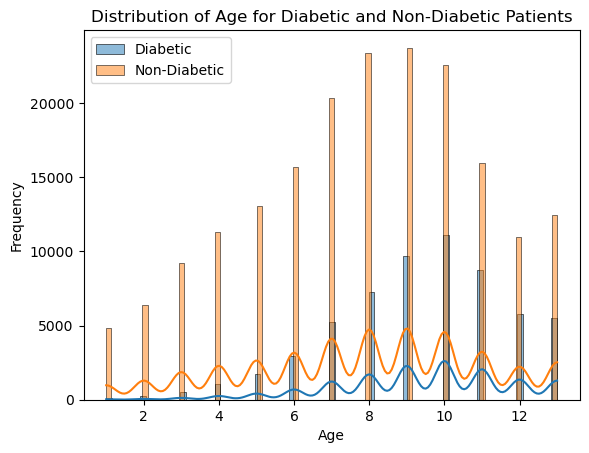

In [90]:
sns.histplot(data[data['Diabetes_Presence(Target)'] == 1]['Age'], label='Diabetic', kde=True)
sns.histplot(data[data['Diabetes_Presence(Target)'] == 0]['Age'], label='Non-Diabetic', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Diabetic and Non-Diabetic Patients')
plt.legend()
plt.show()

### More number of people who are diabetic are distrubuted in the age groups of 8 to 10

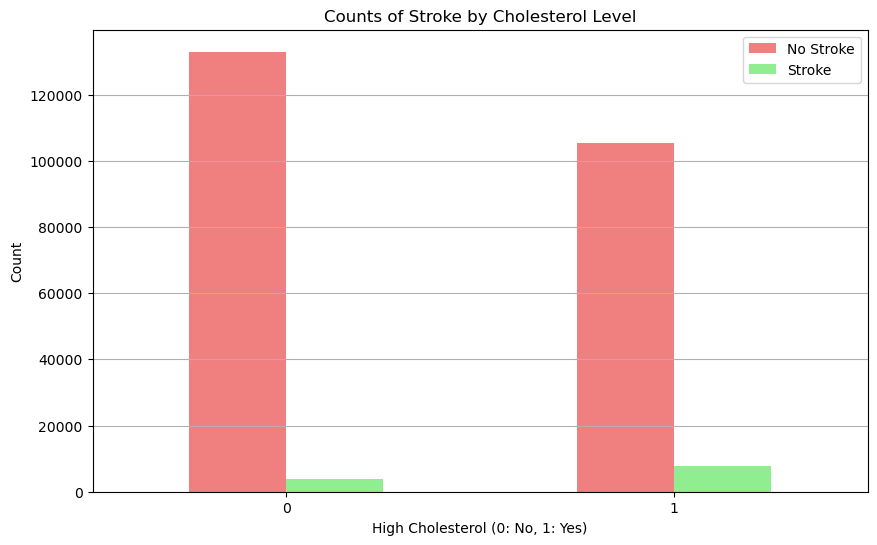

In [92]:
count_data = data.groupby(['HighChol', 'Stroke']).size().unstack(fill_value=0)
count_data.plot(kind='bar', color=['lightcoral', 'lightgreen'], figsize=(10, 6))
plt.title('Counts of Stroke by Cholesterol Level')
plt.xlabel('High Cholesterol (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])
plt.grid(axis='y')
plt.show()


### More number of people from the sample dataset have shown no correlation between having a stroke and a high cholestrol level

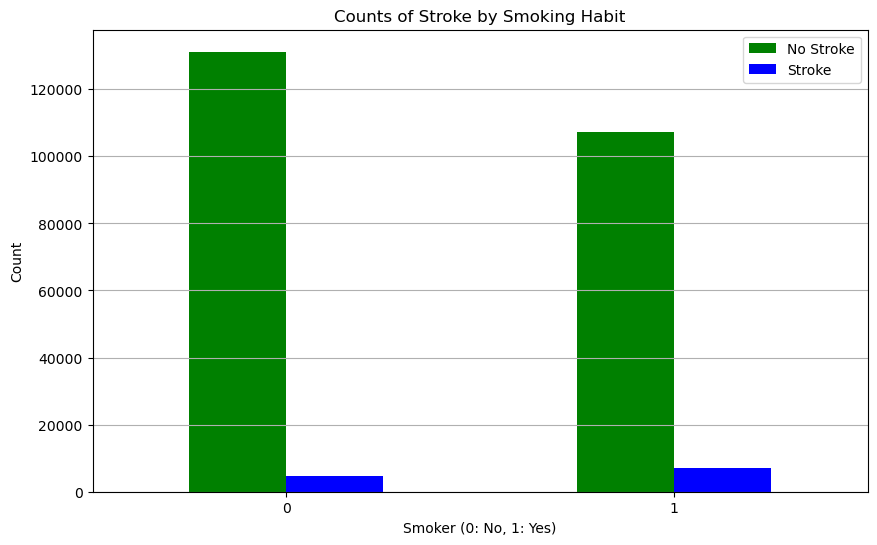

In [94]:
count_data = data.groupby(['Smoker', 'Stroke']).size().unstack(fill_value=0)
count_data.plot(kind='bar', color=['green', 'blue'], figsize=(10, 6))
plt.title('Counts of Stroke by Smoking Habit')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])
plt.grid(axis='y')
plt.show()


### More number of people from the sample dataset have shown no correlation between having a stroke and smoking

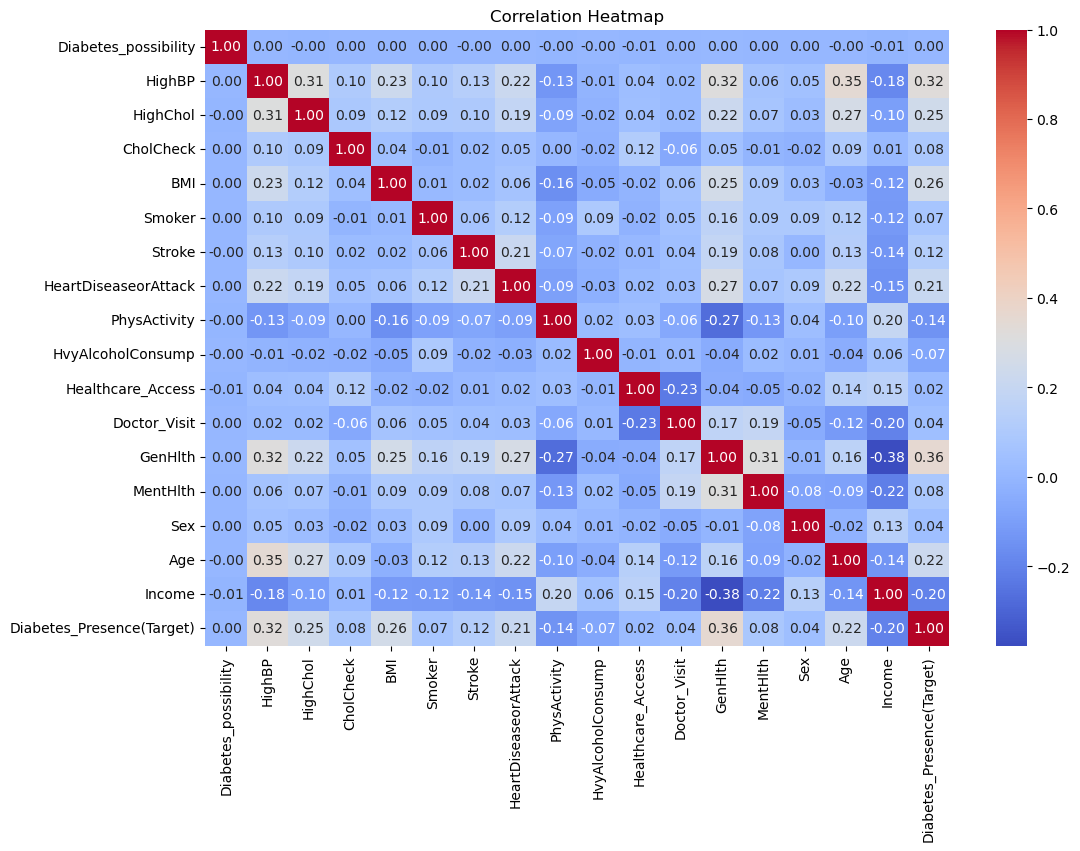

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

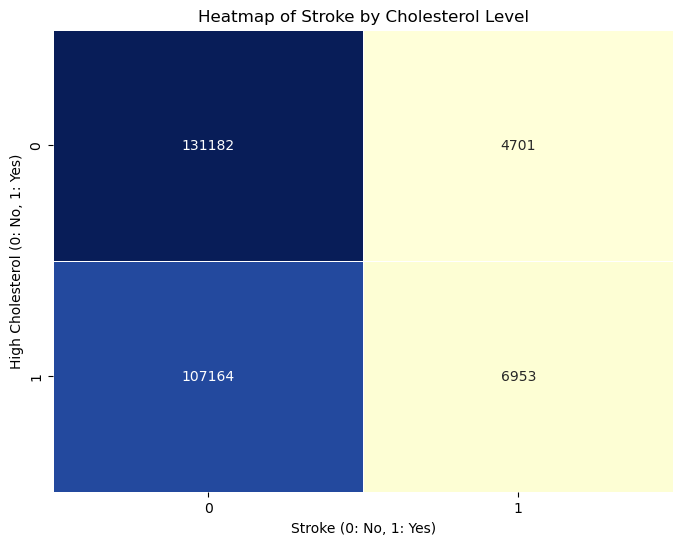

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(count_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=.5)
plt.title('Heatmap of Stroke by Cholesterol Level')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('High Cholesterol (0: No, 1: Yes)')
plt.show()

# 5. OUTLIER DETECTION

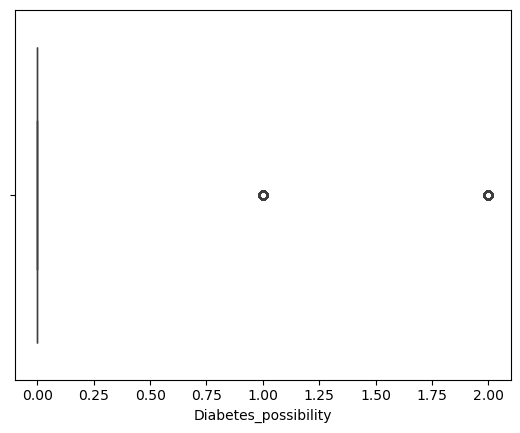

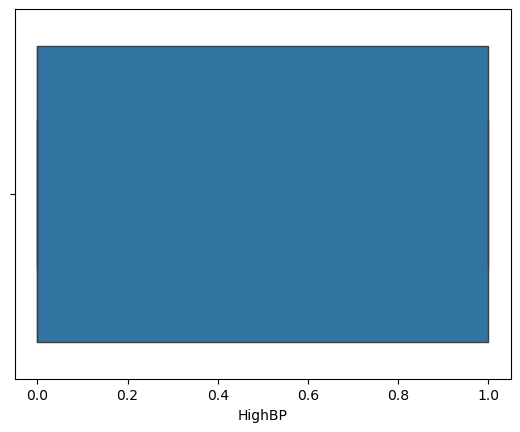

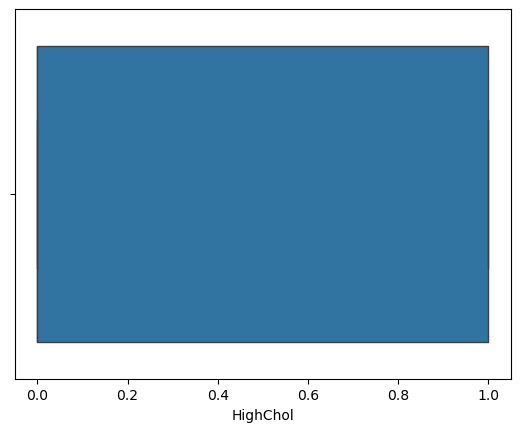

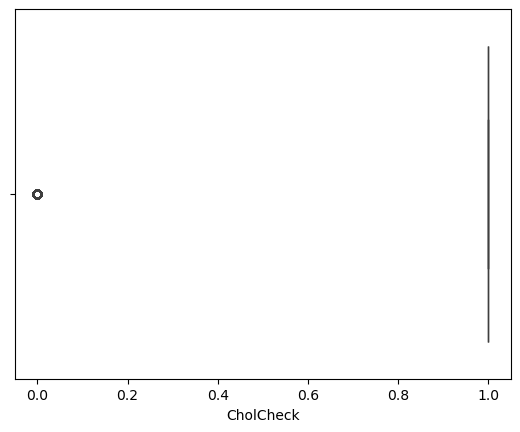

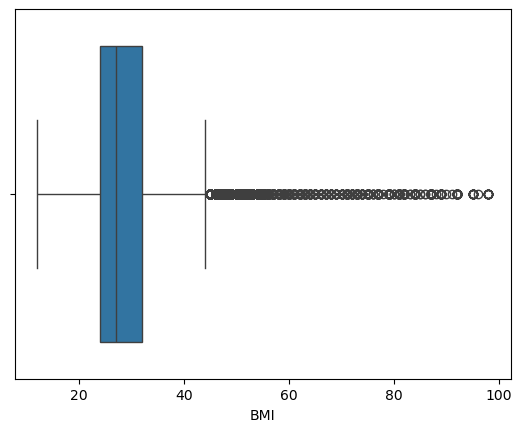

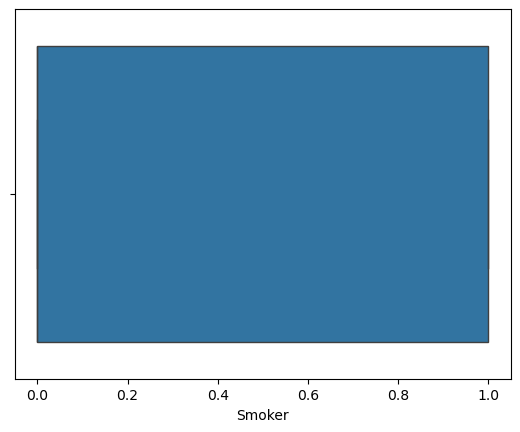

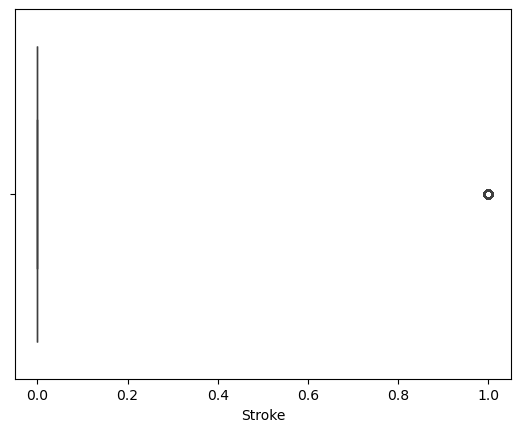

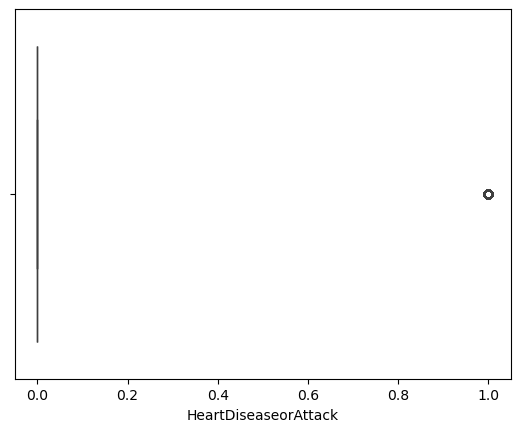

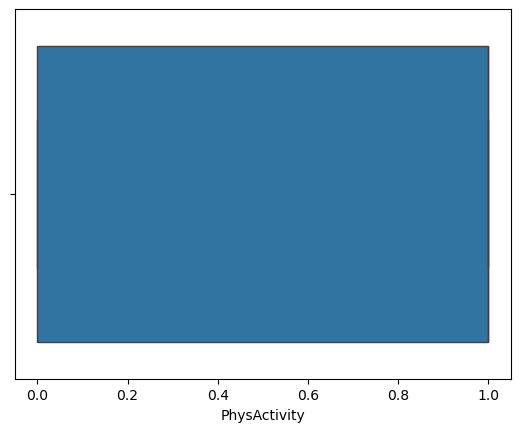

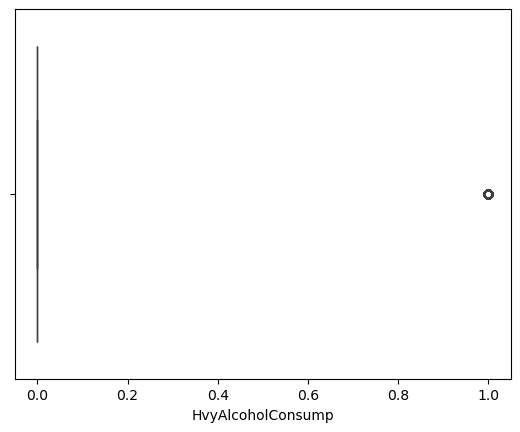

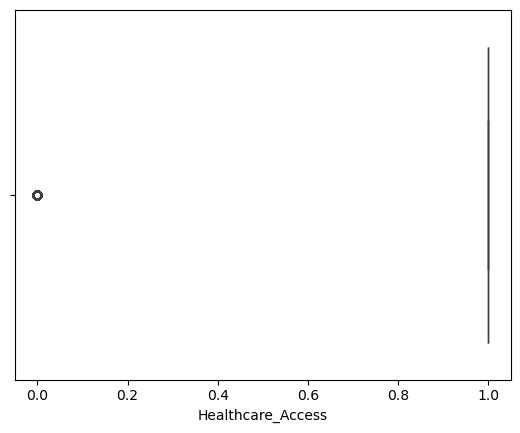

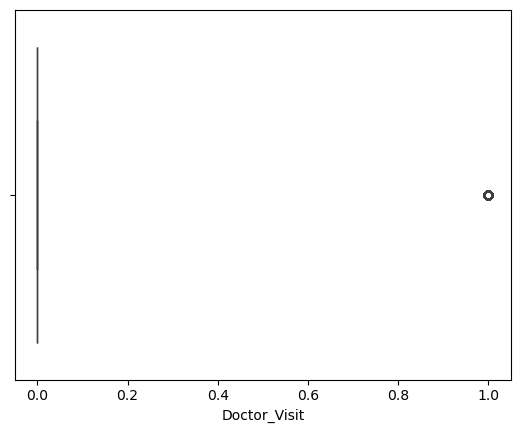

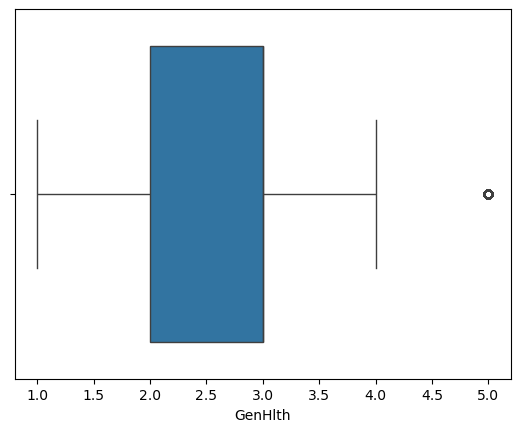

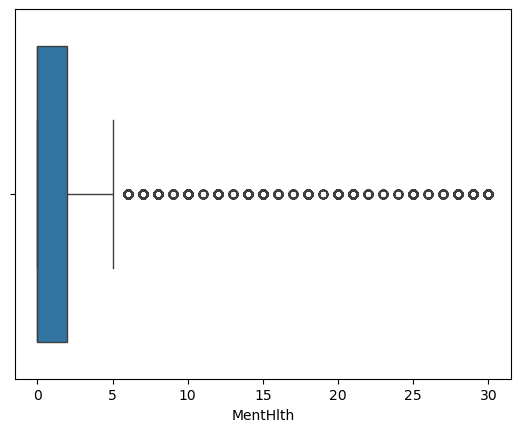

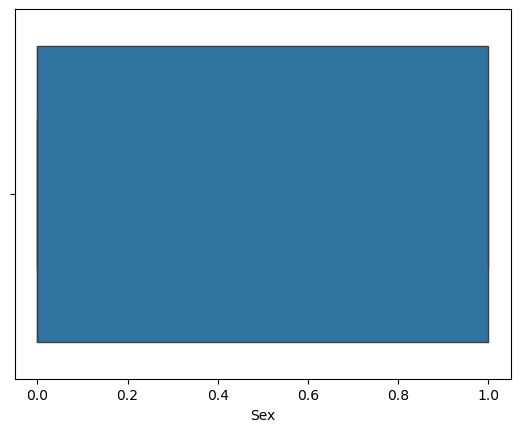

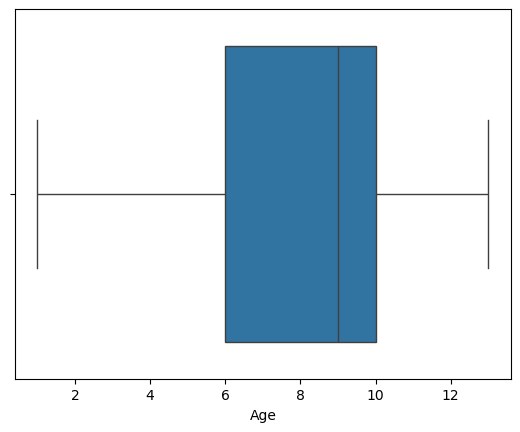

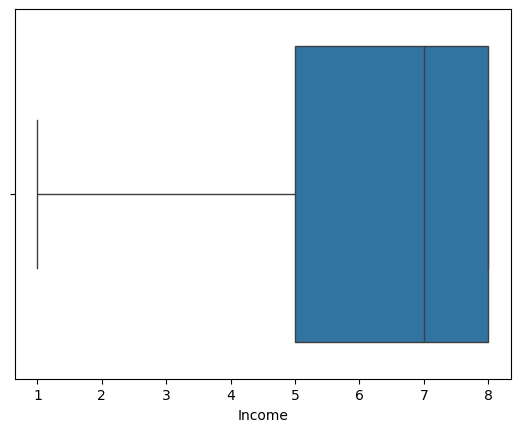

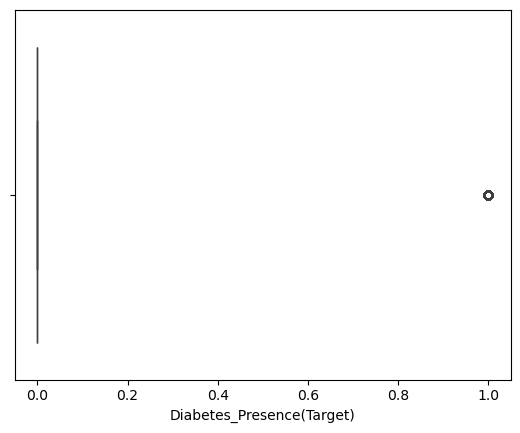

In [99]:
# Box plots for numerical variables
for column in data.select_dtypes(include=['number']):
    sns.boxplot(x=column, data=data)
    plt.show()


### Before

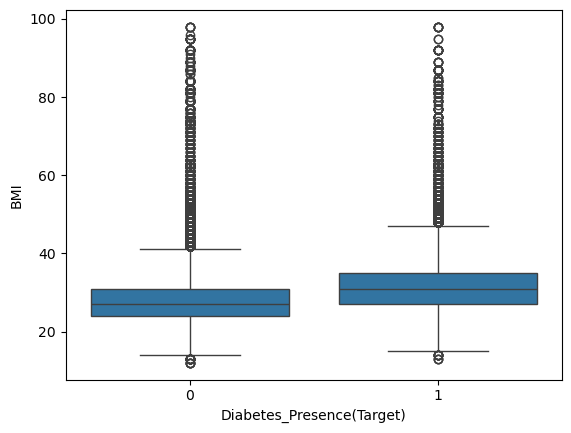

In [101]:
# Before
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

In [102]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data = remove_outliers_iqr(data, 'BMI')

### After

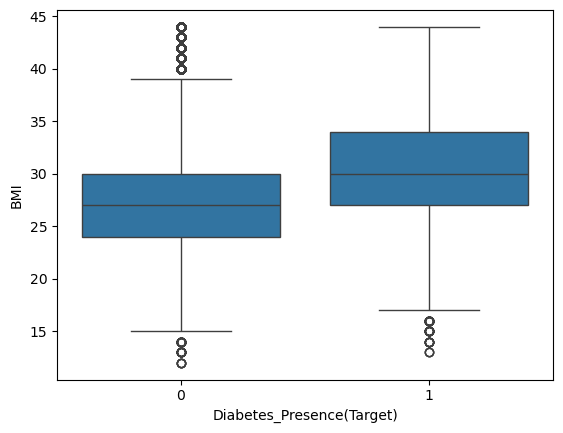

In [104]:
# After
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

In [105]:
data

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income,Diabetes_Presence(Target)
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6,0
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1,0
249997,0,1,0,1,28,1,0,1,1,0,1,0,2,2,0,9,8,0
249998,0,1,1,1,32,0,0,0,0,0,1,0,3,0,1,8,7,1


# 6. MODEL BUILD

In [107]:
data.duplicated().sum()

79745

In [108]:
data = data.drop_duplicates()

In [109]:
data.duplicated().sum()

0

In [110]:
x = data.drop('Diabetes_Presence(Target)',axis=1)
x

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,2,0,1,1,30,1,0,0,1,0,1,0,2,0,0,9,8
249994,0,1,1,1,29,1,0,0,0,0,1,0,4,5,1,10,3
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1


In [111]:
y = data['Diabetes_Presence(Target)']
y

0         0
1         0
2         0
3         0
4         0
         ..
249991    0
249994    0
249995    0
249996    0
249997    0
Name: Diabetes_Presence(Target), Length: 163586, dtype: int64

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [113]:
x_train

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
217751,0,0,0,1,23,0,0,0,1,0,1,0,3,2,1,1,8
208922,0,1,1,1,23,0,0,1,1,0,1,0,5,0,0,12,6
201028,0,0,1,1,33,1,0,0,1,0,1,0,1,30,0,6,6
132452,0,1,0,1,27,1,0,0,1,0,1,0,2,0,0,9,7
146895,0,0,1,1,29,1,0,0,1,1,1,0,2,0,1,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128317,2,0,0,1,33,1,0,0,1,0,1,0,2,0,0,8,8
125520,0,0,1,1,32,0,0,0,1,0,1,0,2,0,0,7,7
228474,0,1,1,1,22,0,0,0,0,0,1,0,2,0,0,13,5
164624,0,0,1,1,30,0,0,0,1,0,1,0,1,0,0,11,8


In [265]:
y_train

217751    0
208922    0
201028    0
132452    0
146895    0
         ..
128317    0
125520    0
228474    0
164624    0
49338     1
Name: Diabetes_Presence(Target), Length: 130868, dtype: int64

In [117]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def train_models_eval(x_train, y_train, fts):
    print("\n---› RANDOM FOREST")
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train[fts], y_train)
    y_pred = rf.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test[fts], y_test))

    print("\n---› DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train[fts], y_train)
    y_pred = dtf.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test[fts], y_test))

    print("\n---› KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train[fts], y_train)
    y_pred = knn.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test[fts], y_test))

    print("\n---› EXTRA TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train[fts], y_train)
    y_pred = etc.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test[fts], y_test))

    print("\n---› XGBOOST")
    xgb = xgboost.XGBClassifier()
    xgb.fit(x_train[fts], y_train)
    y_pred = xgb.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test[fts], y_test))

    print("\n---› SVM")
    svm = SVC()
    svm.fit(x_train[fts], y_train)
    y_pred = svm.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", svm.score(x_test[fts], y_test))

    print("\n---› LOGISTIC REGRESSION")
    lr = LogisticRegression(max_iter=1000)
    lr.fit(x_train[fts], y_train)
    y_pred = lr.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", lr.score(x_test[fts], y_test))

    print("\n---› GRADIENT BOOSTING CLASSIFIER")
    gbc = GradientBoostingClassifier(random_state=1234)
    gbc.fit(x_train[fts], y_train)
    y_pred = gbc.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", gbc.score(x_test[fts], y_test))

    print("\n---› LIGHTGBM")
    lgbm = lgb.LGBMClassifier(random_state=1234)
    lgbm.fit(x_train[fts], y_train)
    y_pred = lgbm.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", lgbm.score(x_test[fts], y_test))

    print("\n---› CATBOOST")
    catboost = CatBoostClassifier(verbose=0, random_state=1234)
    catboost.fit(x_train[fts], y_train)
    y_pred = catboost.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", catboost.score(x_test[fts], y_test))

    print("\n---› ADABOOST")
    adb = AdaBoostClassifier(random_state=1234)
    adb.fit(x_train[fts], y_train)
    y_pred = adb.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", adb.score(x_test[fts], y_test))

    print("\n---› NAIVE BAYES")
    nb = GaussianNB()
    nb.fit(x_train[fts], y_train)
    y_pred = nb.predict(x_test[fts])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", nb.score(x_test[fts], y_test))

    return rf, dtf, knn, etc, xgb, svm, lr, gbc, lgbm, catboost, adb, nb

fts = data.drop('Diabetes_Presence(Target)', axis=1).columns
rf, dtf, knn, etc, xgb, svm, lr, gbc, lgbm, catboost, adb, nb = train_models_eval(x_train, y_train, fts)


---› RANDOM FOREST
[[22490  2863]
 [ 4908  2457]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.33      0.39      7365

    accuracy                           0.76     32718
   macro avg       0.64      0.61      0.62     32718
weighted avg       0.74      0.76      0.75     32718

SCORE: 0.7624854819976771

---› DECISION TREE
[[20387  4966]
 [ 4427  2938]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     25353
           1       0.37      0.40      0.38      7365

    accuracy                           0.71     32718
   macro avg       0.60      0.60      0.60     32718
weighted avg       0.72      0.71      0.72     32718

SCORE: 0.7129103245919677

---› KNN
[[22509  2844]
 [ 5024  2341]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.45      0.32      0.3

## SMOTE

In [291]:
print(y_train.value_counts())

Diabetes_Presence(Target)
0    100938
1     29930
Name: count, dtype: int64


In [293]:
smote=SMOTE()

In [295]:
x_res_train,y_res_train = smote.fit_resample(x_train,y_train)

In [296]:
x_res_train

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
0,0,0,0,1,23,0,0,0,1,0,1,0,3,2,1,1,8
1,0,1,1,1,23,0,0,1,1,0,1,0,5,0,0,12,6
2,0,0,1,1,33,1,0,0,1,0,1,0,1,30,0,6,6
3,0,1,0,1,27,1,0,0,1,0,1,0,2,0,0,9,7
4,0,0,1,1,29,1,0,0,1,1,1,0,2,0,1,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201871,0,1,1,1,33,1,0,0,0,0,1,1,5,4,0,11,2
201872,0,1,1,1,27,1,0,0,0,0,1,0,5,0,0,9,6
201873,0,1,1,1,36,0,0,1,1,0,1,0,3,2,1,11,5
201874,2,0,1,1,26,1,0,0,1,0,1,0,2,5,1,6,7


In [297]:
y_res_train

0         0
1         0
2         0
3         0
4         0
         ..
201871    1
201872    1
201873    1
201874    1
201875    1
Name: Diabetes_Presence(Target), Length: 201876, dtype: int64

## PCA

In [138]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Split the PCA-transformed data
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Redefine the training function to take the PCA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the PCA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_pca, y_train, x_test_pca, y_test)



---›RANDOM FOREST
[[22646  2707]
 [ 5155  2210]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25353
           1       0.45      0.30      0.36      7365

    accuracy                           0.76     32718
   macro avg       0.63      0.60      0.61     32718
weighted avg       0.73      0.76      0.74     32718

SCORE: 0.7597041383947674

---›DECISION TREE
[[20386  4967]
 [ 4728  2637]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     25353
           1       0.35      0.36      0.35      7365

    accuracy                           0.70     32718
   macro avg       0.58      0.58      0.58     32718
weighted avg       0.71      0.70      0.71     32718

SCORE: 0.7036799315361575

---›KNN
[[22460  2893]
 [ 5014  2351]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.45      0.32      0.37  

In [160]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.90)  # Keep 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Split the PCA-transformed data
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Redefine the training function to take the PCA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the PCA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_pca, y_train, x_test_pca, y_test)



---›RANDOM FOREST
[[22639  2714]
 [ 5174  2191]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25353
           1       0.45      0.30      0.36      7365

    accuracy                           0.76     32718
   macro avg       0.63      0.60      0.60     32718
weighted avg       0.73      0.76      0.74     32718

SCORE: 0.7589094687939361

---›DECISION TREE
[[20433  4920]
 [ 4767  2598]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     25353
           1       0.35      0.35      0.35      7365

    accuracy                           0.70     32718
   macro avg       0.58      0.58      0.58     32718
weighted avg       0.71      0.70      0.70     32718

SCORE: 0.7039244452594902

---›KNN
[[22492  2861]
 [ 4943  2422]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.33      0.38  

In [162]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.85)  # Keep 85% of variance
x_pca = pca.fit_transform(x_scaled)

# Split the PCA-transformed data
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Redefine the training function to take the PCA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the PCA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_pca, y_train, x_test_pca, y_test)



---›RANDOM FOREST
[[22652  2701]
 [ 5215  2150]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25353
           1       0.44      0.29      0.35      7365

    accuracy                           0.76     32718
   macro avg       0.63      0.59      0.60     32718
weighted avg       0.73      0.76      0.74     32718

SCORE: 0.7580536707622715

---›DECISION TREE
[[20449  4904]
 [ 4797  2568]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     25353
           1       0.34      0.35      0.35      7365

    accuracy                           0.70     32718
   macro avg       0.58      0.58      0.58     32718
weighted avg       0.71      0.70      0.70     32718

SCORE: 0.7034965462436579

---›KNN
[[22493  2860]
 [ 4953  2412]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.33      0.38  

In [164]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.80)  # Keep 80% of variance
x_pca = pca.fit_transform(x_scaled)

# Split the PCA-transformed data
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Redefine the training function to take the PCA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the PCA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_pca, y_train, x_test_pca, y_test)



---›RANDOM FOREST
[[22636  2717]
 [ 5235  2130]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25353
           1       0.44      0.29      0.35      7365

    accuracy                           0.76     32718
   macro avg       0.63      0.59      0.60     32718
weighted avg       0.73      0.76      0.74     32718

SCORE: 0.7569533590072742

---›DECISION TREE
[[20328  5025]
 [ 4798  2567]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     25353
           1       0.34      0.35      0.34      7365

    accuracy                           0.70     32718
   macro avg       0.57      0.58      0.57     32718
weighted avg       0.70      0.70      0.70     32718

SCORE: 0.6997677119628339

---›KNN
[[22485  2868]
 [ 4975  2390]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.45      0.32      0.38  

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply LDA
lda = LDA(n_components=min(len(set(y))-1, x.shape[1]))  # LDA components <= number of classes - 1
x_lda = lda.fit_transform(x_scaled, y)

# Split the LDA-transformed data
x_train_lda, x_test_lda, y_train, y_test = train_test_split(x_lda, y, test_size=0.2, random_state=0)

# Redefine the training function to take the LDA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the LDA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_lda, y_train, x_test_lda, y_test)


---›RANDOM FOREST
[[20348  5005]
 [ 4852  2513]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     25353
           1       0.33      0.34      0.34      7365

    accuracy                           0.70     32718
   macro avg       0.57      0.57      0.57     32718
weighted avg       0.70      0.70      0.70     32718

SCORE: 0.6987285286386699

---›DECISION TREE
[[20483  4870]
 [ 4936  2429]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     25353
           1       0.33      0.33      0.33      7365

    accuracy                           0.70     32718
   macro avg       0.57      0.57      0.57     32718
weighted avg       0.70      0.70      0.70     32718

SCORE: 0.700287303624916

---›KNN
[[22609  2744]
 [ 5005  2360]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.32      0.38   

### LDA

In [167]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply LDA
lda = LDA(n_components=min(len(set(y))-1, x.shape[1]))  # LDA components <= number of classes - 1
x_lda = lda.fit_transform(x_scaled, y)

# Split the LDA-transformed data
x_train_lda, x_test_lda, y_train, y_test = train_test_split(x_lda, y, test_size=0.2, random_state=0)

# Redefine the training function to take the LDA-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))
    
    print("\n---›XGBOOST" )
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))
    
    return rf, dtf, knn, etc, xgb

# Train models using the LDA-reduced data
rf, dtf, knn, etc, xgb = train_models_eval(x_train_lda, y_train, x_test_lda, y_test)



---›RANDOM FOREST
[[20348  5005]
 [ 4852  2513]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     25353
           1       0.33      0.34      0.34      7365

    accuracy                           0.70     32718
   macro avg       0.57      0.57      0.57     32718
weighted avg       0.70      0.70      0.70     32718

SCORE: 0.6987285286386699

---›DECISION TREE
[[20483  4870]
 [ 4936  2429]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     25353
           1       0.33      0.33      0.33      7365

    accuracy                           0.70     32718
   macro avg       0.57      0.57      0.57     32718
weighted avg       0.70      0.70      0.70     32718

SCORE: 0.700287303624916

---›KNN
[[22609  2744]
 [ 5005  2360]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.32      0.38   

## UMAP

In [145]:
import umap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Standardize the data before UMAP
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)  # You can change n_components as needed
x_umap = umap_model.fit_transform(x_scaled)

# Split the UMAP-transformed data
x_train_umap, x_test_umap, y_train, y_test = train_test_split(x_umap, y, test_size=0.2, random_state=0)

# Redefine the training function to take the UMAP-transformed data
def train_models_eval(x_train, y_train, x_test, y_test):
    print("\n---›RANDOM FOREST")
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", rf.score(x_test, y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", dtf.score(x_test, y_test))
    
    print("\n---›KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", knn.score(x_test, y_test))
    
    print("\n---›EXTRA TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train, y_train)
    y_pred = etc.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", etc.score(x_test, y_test))

    print("\n---›XGBOOST")
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("SCORE:", xgb.score(x_test, y_test))

    return rf, dtf, knn, etc, xgb

# Train models using the UMAP-reduced data
rf, dtf, knn, etc, xgb= train_models_eval(x_train_umap, y_train, x_test_umap, y_test)



---›RANDOM FOREST
[[22306  3047]
 [ 5179  2186]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     25353
           1       0.42      0.30      0.35      7365

    accuracy                           0.75     32718
   macro avg       0.61      0.59      0.60     32718
weighted avg       0.72      0.75      0.73     32718

SCORE: 0.7485787639831285

---›DECISION TREE
[[20252  5101]
 [ 4682  2683]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     25353
           1       0.34      0.36      0.35      7365

    accuracy                           0.70     32718
   macro avg       0.58      0.58      0.58     32718
weighted avg       0.71      0.70      0.70     32718

SCORE: 0.7009902805794975

---›KNN
[[22536  2817]
 [ 5174  2191]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     25353
           1       0.44      0.30      0.35  

## Hyperparameter Tuning

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Assume your target column is 'Diabetes_Presence(Target)' and your data is in 'data'
X = data.drop('Diabetes_Presence(Target)', axis=1)
y = data['Diabetes_Presence(Target)']

# Encode categorical features if necessary (Label Encoding for target if it's categorical)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features (optional, but can improve performance for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 1. XGBoost Classifier (No tuning) ---
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# --- 2. LightGBM Classifier (No tuning) ---
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# --- 3. CatBoost Classifier (No tuning) ---
cat_model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=1000, random_state=42, cat_features=[])
cat_model.fit(X_train, y_train)

# --- 4. Evaluate models ---

# 1. XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("\nXGBoost Evaluation:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 2. LightGBM Evaluation
y_pred_lgb = lgb_model.predict(X_test_scaled)
print("\nLightGBM Evaluation:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# 3. CatBoost Evaluation
y_pred_cat = cat_model.predict(X_test)
print("\nCatBoost Evaluation:")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# --- 5. Final Model Comparison ---
# You can compare the accuracy or other metrics here
print("\n--- Final Model Comparison ---")
xgb_accuracy = xgb_model.score(X_test_scaled, y_test)
lgb_accuracy = lgb_model.score(X_test_scaled, y_test)
cat_accuracy = cat_model.score(X_test, y_test)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"LightGBM Accuracy: {lgb_accuracy:.4f}")
print(f"CatBoost Accuracy: {cat_accuracy:.4f}")


[LightGBM] [Info] Number of positive: 29856, number of negative: 101012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 130868, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228138 -> initscore=-1.218853
[LightGBM] [Info] Start training from score -1.218853
0:	learn: 0.6338188	total: 70ms	remaining: 1m 9s
1:	learn: 0.5923315	total: 79.7ms	remaining: 39.7s
2:	learn: 0.5582788	total: 89.3ms	remaining: 29.7s
3:	learn: 0.5320786	total: 98.6ms	remaining: 24.5s
4:	learn: 0.5110563	total: 108ms	remaining: 21.4s
5:	learn: 0.4953885	total: 117ms	remaining: 19.3s
6:	learn: 0.4836297	total: 125ms	remaining: 17.7s
7:	learn: 0.4743642	total: 135ms	remaining: 16.7s
8:	learn: 0.4666802	total: 144ms	remain

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Assume your target column is 'Diabetes_Presence(Target)'
X = data.drop('Diabetes_Presence(Target)', axis=1)
y = data['Diabetes_Presence(Target)']

# Encode categorical features if necessary
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check if lengths are the same after SMOTE
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")

# Standardizing features (optional, but can improve performance for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# --- 1. Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# --- 2. XGBoost Classifier ---
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("\nXGBoost Evaluation:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# --- 3. LightGBM Classifier ---
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train_smote)
y_pred_lgb = lgb_model.predict(X_test_scaled)
print("\nLightGBM Evaluation:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# --- 4. CatBoost Classifier ---
cat_model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=1000, random_state=42, cat_features=[])
cat_model.fit(X_train_smote, y_train_smote, cat_features=[])
y_pred_cat = cat_model.predict(X_test)
print("\nCatBoost Evaluation:")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# --- 5. Support Vector Machine (SVM) ---
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_smote)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM Evaluation:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# --- 6. Final Model Comparison ---
print("\nFinal Model Comparison")
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model, 'CatBoost': cat_model, 'SVM': svm_model}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = model.score(X_test_scaled, y_test)
    print(f'{name} Accuracy: {accuracy:.4f}')


X_train_smote shape: (202024, 17)
y_train_smote shape: (202024,)

Random Forest Evaluation:
[[19436  5843]
 [ 3423  4016]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     25279
           1       0.41      0.54      0.46      7439

    accuracy                           0.72     32718
   macro avg       0.63      0.65      0.64     32718
weighted avg       0.75      0.72      0.73     32718


XGBoost Evaluation:
[[17188  8091]
 [ 1897  5542]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.77     25279
           1       0.41      0.74      0.53      7439

    accuracy                           0.69     32718
   macro avg       0.65      0.71      0.65     32718
weighted avg       0.79      0.69      0.72     32718

[LightGBM] [Info] Number of positive: 101012, number of negative: 101012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004522 sec